# Final Excercise

In this notebook, you will find the last exercise of the lecture:
You are handed an initial dataset with several features and a univariate target. Next, you have to decide how to proceed. Since you do not have enough data to yet construct a classifier/predictor of any sensible evaluation metrics, the first task is, therefore, to acquire more data. For this purpose you can obtain batches of data according to your own design of experiments, so you will need to decide which experiments you consider necessary to perform. 

You will have four opportunities to acquire more data. Each time you have to decide which experiments to run and send those to Franz Götz-Hahn as a CSV file. The deadlines are 16.06.2023, 23.06.2023, 30.06.2023, and 07.07.2023 and 12:00 (noon). The format in all cases is a table with one row for each choosable feature, and the column entries corresponding to the desired values. Each individual sample will take approximately 30min, so pick a reasonable amount of experiments. For example, you will get the result for 100 experiments roughly 50 hours after the respective deadline. Should the experiment not be conductible, you will get a ``None`` as a result, e.g., if a feature value is out of range.

Once you have your data, you should compare the performance of different classifiers in predicting the targets. The classifiers to compare are [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), and [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). You should utilize all the different parts of the E2ML lecture that you considern appropriate. This could include Data Preprocessing, Design of Experiments for the batches, deciding on Performance Measures, Statistical Significance Testing of a hypothesis, Design of Experiments for Hyperparameter Optimization.

Should you wish to present the results from this excercise in the oral examination, you need to hand in your entire package until 14.07.2023-23:59 as a GitHub Repository. Send the link to the (public) repository to Franz Götz-Hahn via [E-Mail](mailto:franz.goetz-hahn@uni-kassel.de). Please use the README of the repository to describe the structure of the package, include any required packages in the setup.py, add the data in the data subfolder, save any results in the results subfolder, and include a _descriptive_ jupyter notebook in the notebooks subfolder.

Do note, that the point of this excercise is **not** to achieve the best performance of your models, but rather to document your process and give the motivation behind your chosen approaches, _even the ones that failed_.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from e2ml import utils

#### molluscs
Bestimmte/konkrete Muschelart.

### **Mollusc Classification** <a class="anchor" id="heart"></a>

Your dataset describes some physical measurements of a specific type of molluscs. Your goal is to predict the `Stage of Life` of the mollusc. The data you can get looks as follows:


| Sex	|Length	|Width	|Height|	Weight	|Non_Shell Weight	|Intestine Weight	|Shell Weight	|Stage of Life |
| ---                           | ----   | ----    | ----    | ----   |----             |----    |---- | ---------- |
| {Male (M), Female (F), Indeterminate (I)} | float (inches)     | float (inches)     |  float (inches)     | float (gram)      | float (gram)              | float (gram)     |  float (gram)     | {Child, Adolescent (Adole), Adult}      |

The table headings are identical to the column names in the corresponding CSV-files. 

We can send out divers that look for molluscs that fit your needs, which will subsequently be analyzed in a laboratory. You can request molluscs with all features except the Stage of Life attribute, as it is the target. The first day of diving has already been completed. After 8 hours of diving, they brought up the following molluscs:

In [3]:
initial_molluscs_data = pd.read_csv('../data/initial_molluscs_data.csv')
initial_molluscs_data

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,F,0.450,0.345,0.120,0.4165,0.1655,0.0950,0.1350,Adult
1,F,0.475,0.380,0.145,0.5700,0.1670,0.1180,0.1870,Adole
2,M,0.610,0.485,0.170,1.0225,0.4190,0.2405,0.3600,Adult
3,I,0.430,0.340,0.105,0.4405,0.2385,0.0745,0.1075,Adole
4,M,0.205,0.155,0.045,0.0425,0.0170,0.0055,0.0155,Adult
5,M,0.600,0.475,0.175,1.3445,0.5490,0.2875,0.3600,Child
6,I,0.515,0.390,0.110,0.5310,0.2415,0.0980,0.1615,Adult
7,F,0.625,0.495,0.160,1.1115,0.4495,0.2825,0.3450,Child
8,F,0.650,0.520,0.195,1.6275,0.6890,0.3905,0.4320,Adult
9,F,0.620,0.480,0.165,1.0430,0.4835,0.2210,0.3100,Adult


## Exploration of initial dataset

In order to determine which samples to obtain next, one has to analyse what is already present.
Thus, the next step is to explore the initial dataset.
1. Methods used to explore each feature individually include box/violine plots, histograms, PDFs and CDFs.
2. Methods used to explore the relationship between feature include scatter plots and correlation matrices.

In [4]:
# store features, i.e. column names, in a list
features = initial_molluscs_data.columns
print(features)

Index(['Sex', 'Length', 'Width', 'Height', 'Weight', 'Non_Shell Weight',
       'Intestine Weight', 'Shell Weight', 'Stage of Life'],
      dtype='object')


In [5]:
initial_molluscs_data.describe()

,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.534375,0.421875,0.144062,0.877875,0.376344,0.187531,0.254938
std,0.124176,0.105560,0.041240,0.496578,0.224390,0.109644,0.135996
min,0.205000,0.155000,0.045000,0.042500,0.017000,0.005500,0.015500
25%,0.468750,0.371250,0.117500,0.508375,0.220625,0.097250,0.154875
50%,0.560000,0.442500,0.155000,0.915000,0.370500,0.201000,0.267500
75%,0.621250,0.487500,0.171250,1.163625,0.497125,0.268250,0.360000
max,0.680000,0.560000,0.195000,1.777500,0.861000,0.390500,0.455000


In [6]:
# create dataframe containing features transformed to numerical/categorical values
initial_molluscs_data_numerical = initial_molluscs_data.copy()
initial_molluscs_data_numerical['Stage of Life'] = initial_molluscs_data_numerical['Stage of Life'].astype('category')
initial_molluscs_data_numerical['Sex'] = initial_molluscs_data_numerical['Sex'].astype('category')

In [7]:
# display data types of features
print('data tyes: ', initial_molluscs_data_numerical.dtypes)

data tyes:  Sex                 category
Length               float64
Width                float64
Height               float64
Weight               float64
Non_Shell Weight     float64
Intestine Weight     float64
Shell Weight         float64
Stage of Life       category
dtype: object


In [8]:
# catgegorical features translated
cat_code_translation_life_stages = dict(enumerate(initial_molluscs_data_numerical['Stage of Life'].cat.categories))
print(cat_code_translation_life_stages)

cat_code_translation_sex = dict(enumerate(initial_molluscs_data_numerical['Sex'].cat.categories))
print(cat_code_translation_sex)

{0: 'Adole', 1: 'Adult', 2: 'Child'}
{0: 'F', 1: 'I', 2: 'M'}


In [9]:
# feature conversion
initial_molluscs_data_numerical['Sex'] = initial_molluscs_data_numerical['Sex'].cat.codes

# target feature conversion &  description
initial_molluscs_data_numerical['Stage of Life'] = initial_molluscs_data_numerical['Stage of Life'].cat.codes
initial_molluscs_data_numerical['Stage of Life'].describe()

count    16.000000
mean      0.875000
std       0.718795
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: Stage of Life, dtype: float64

### (1) Exploration of single feature

1.1. Box and violin plots

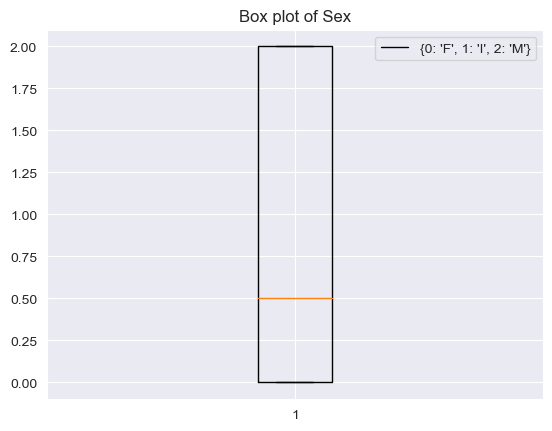

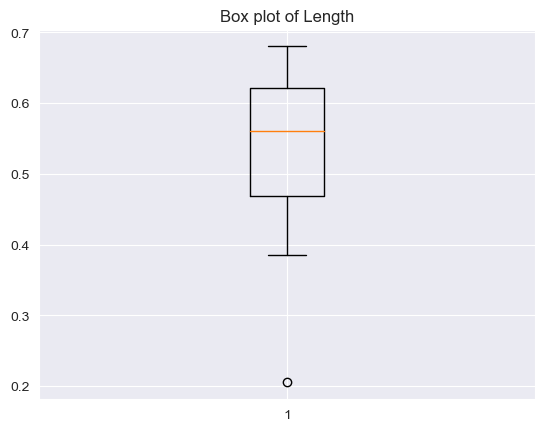

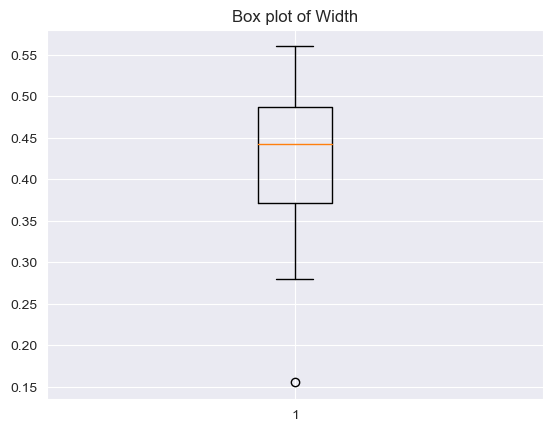

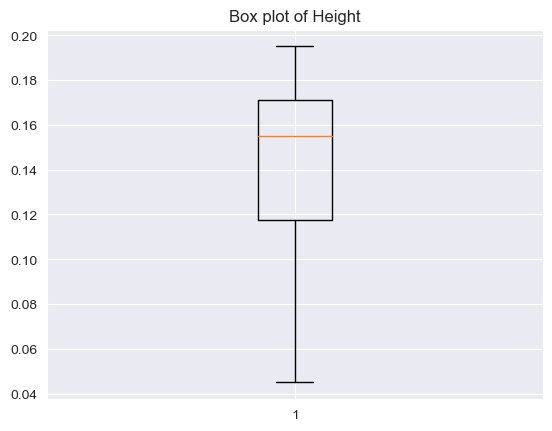

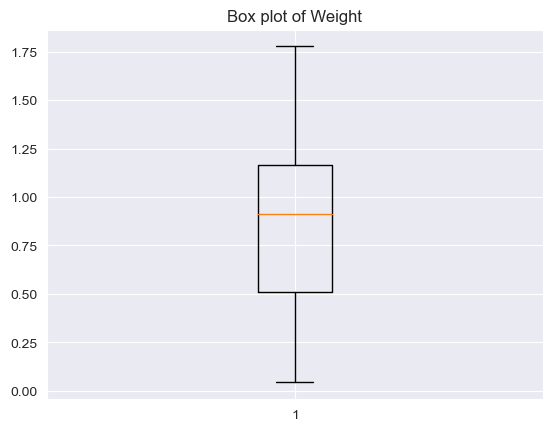

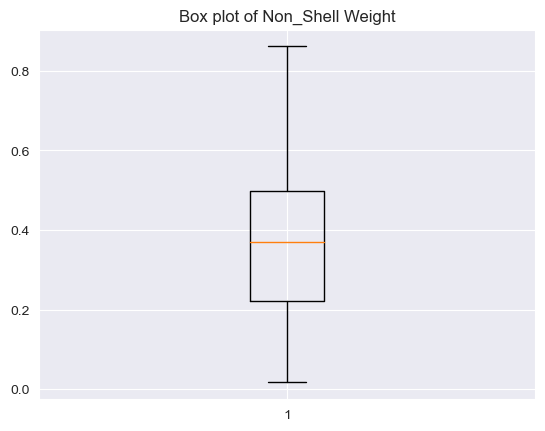

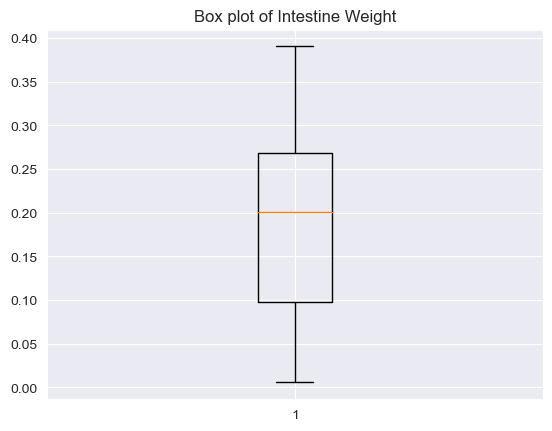

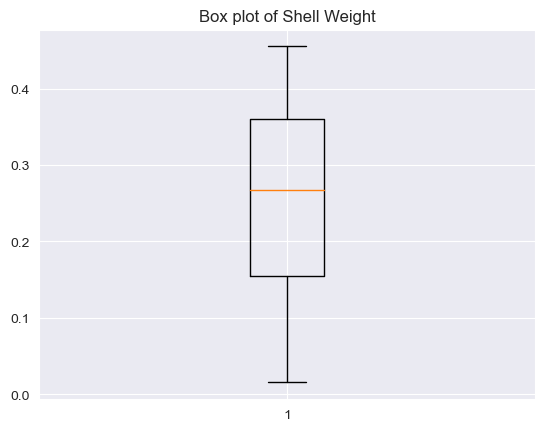

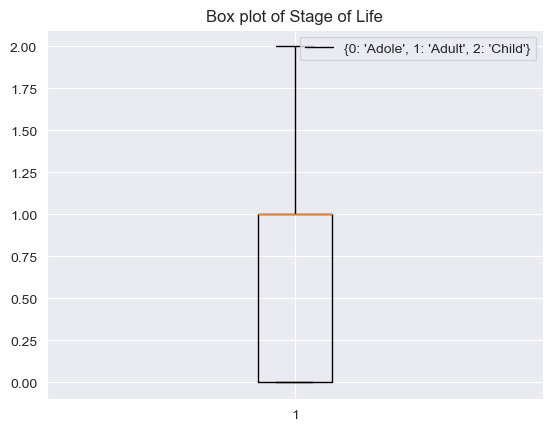

In [10]:
import matplotlib.pyplot as plt

for feat in features:
    data = initial_molluscs_data_numerical[feat]
    plt.title(f'Box plot of {feat}')

    box = plt.boxplot(data)
    if feat == 'Sex':
        plt.legend([box['boxes'][0]], [cat_code_translation_sex])
    elif feat == 'Stage of Life':
        plt.legend([box['boxes'][0]], [cat_code_translation_life_stages])
    plt.show()

The majority of the initial dataset are female shells.
The box plot of the target features Length and Width has the same shape.
The box plot of the target features Weight and Non_shell weight has the same shape.

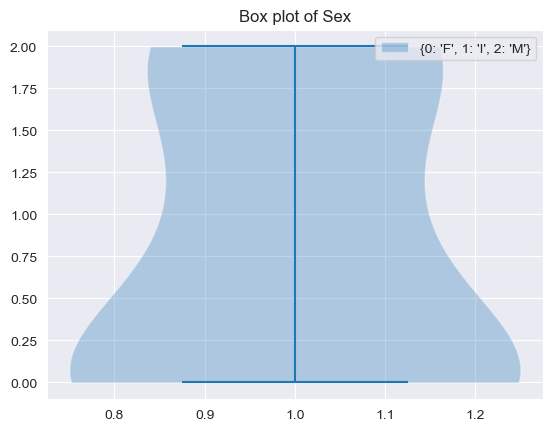

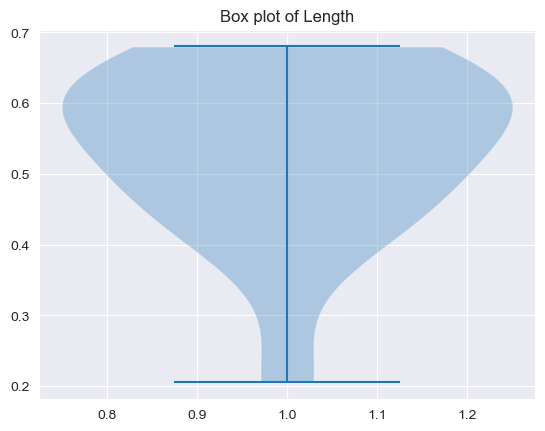

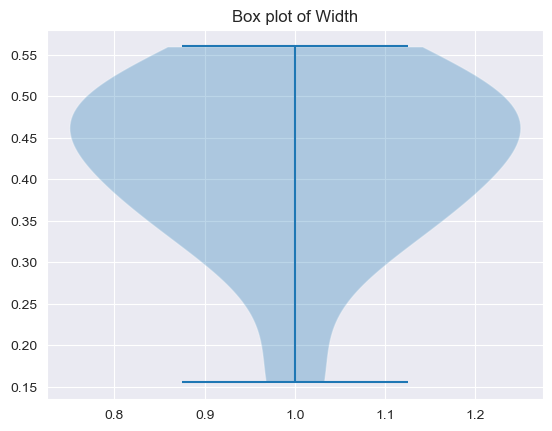

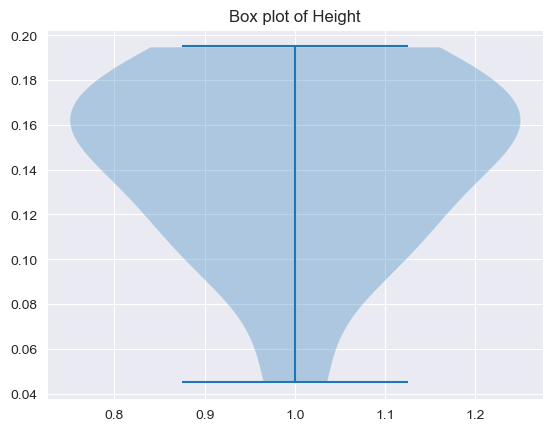

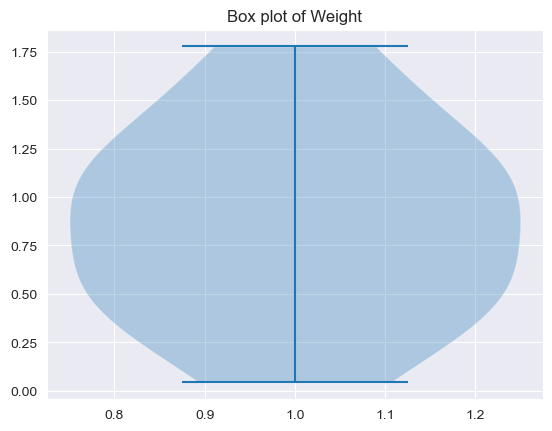

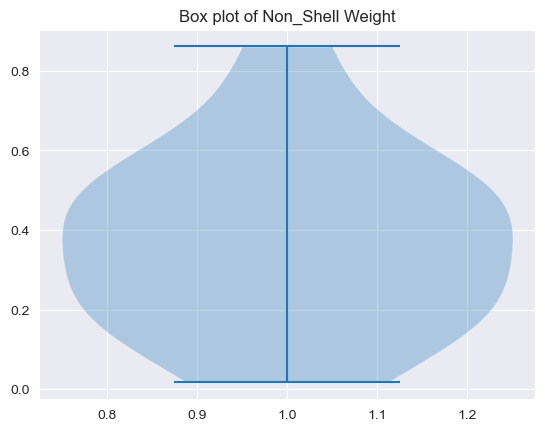

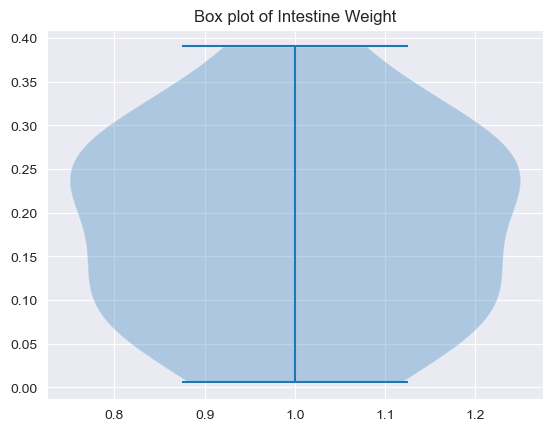

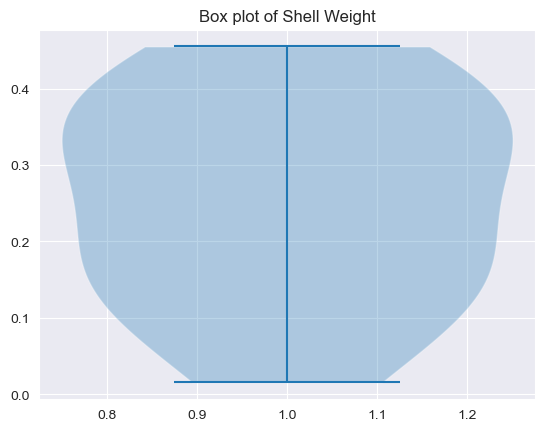

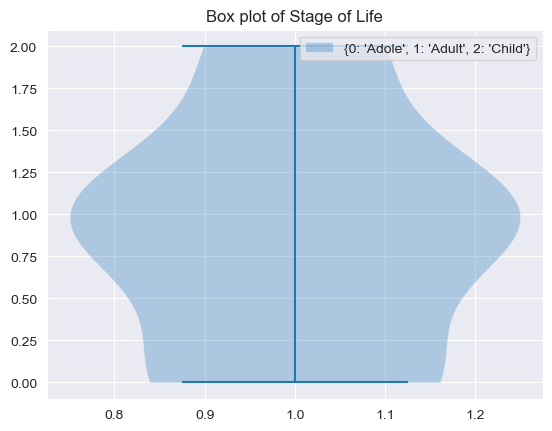

In [11]:
for feat in features:
    data = initial_molluscs_data_numerical[feat]
    plt.title(f'Box plot of {feat}')

    box = plt.violinplot(data)
    if feat == 'Sex':
        plt.legend([box['bodies'][0]], [cat_code_translation_sex])
    elif feat == 'Stage of Life':
        plt.legend([box['bodies'][0]], [cat_code_translation_life_stages])
    plt.show()

Length, Width and Height a skewed (have most entries at the top of their value range).
The rest of the features have most entries around the mean of their value space.

1.2. Histograms

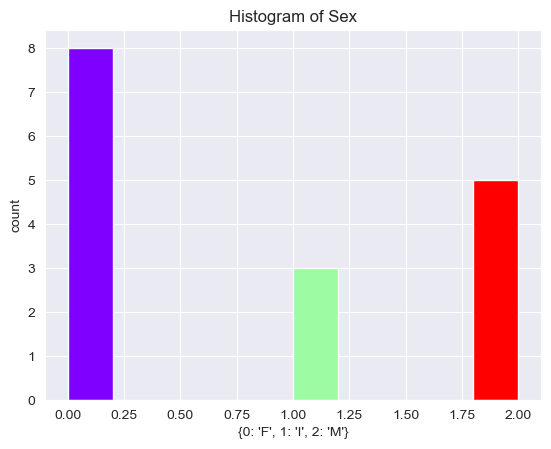

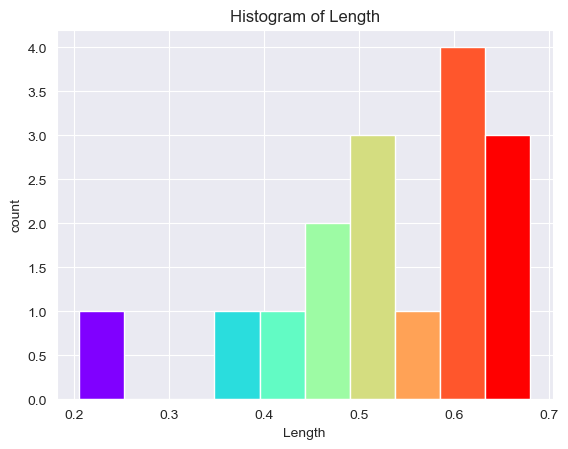

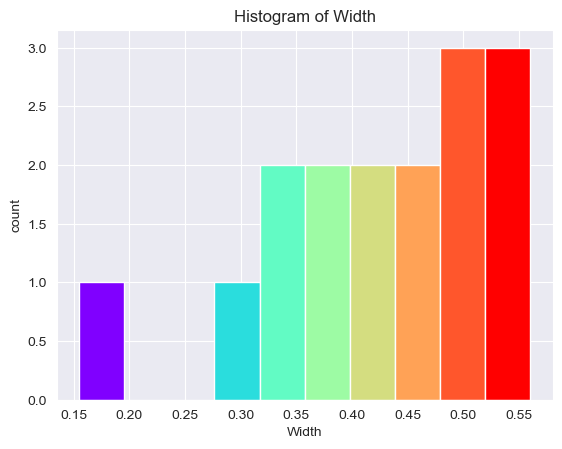

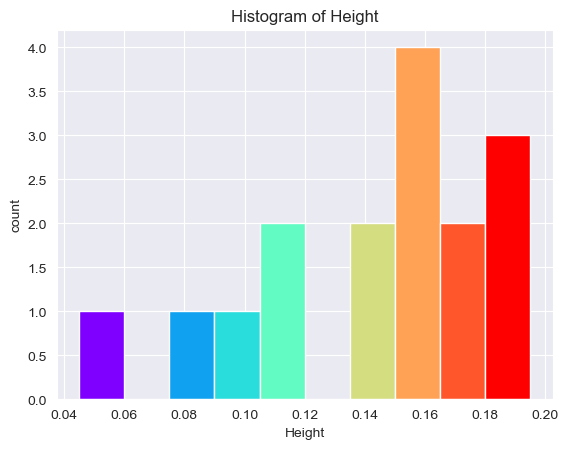

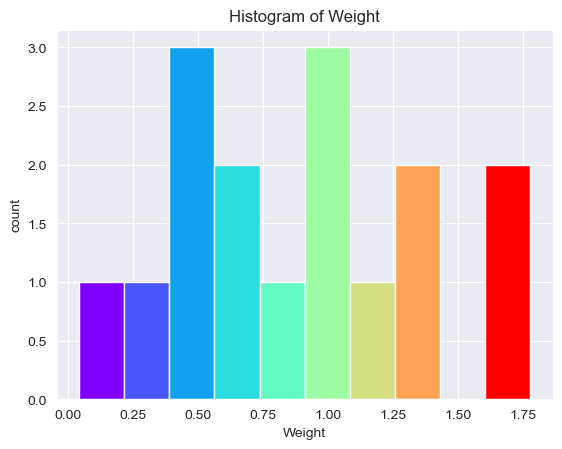

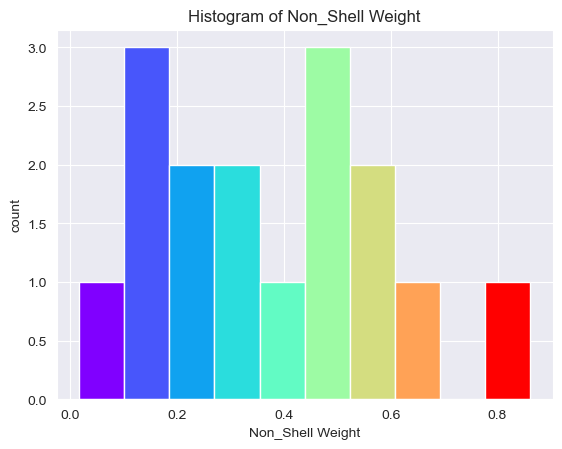

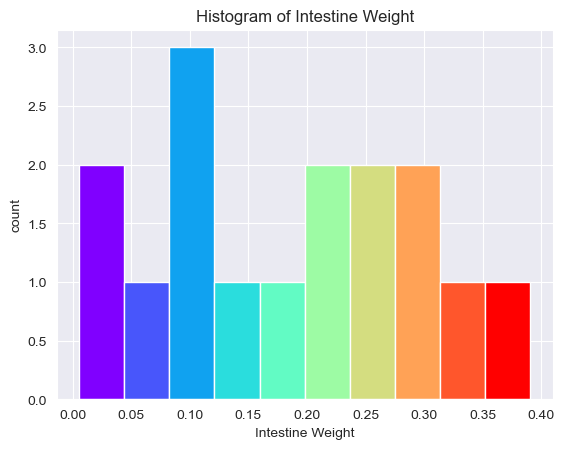

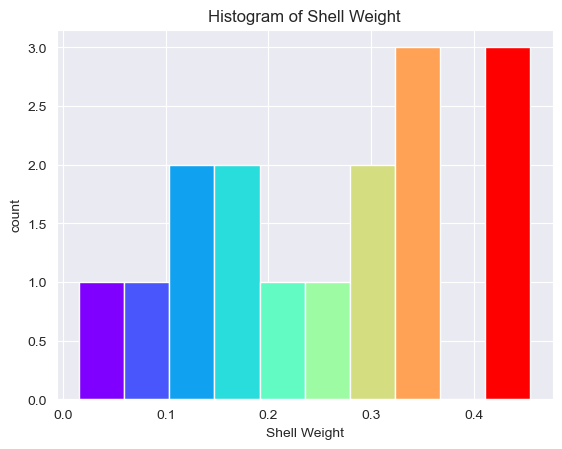

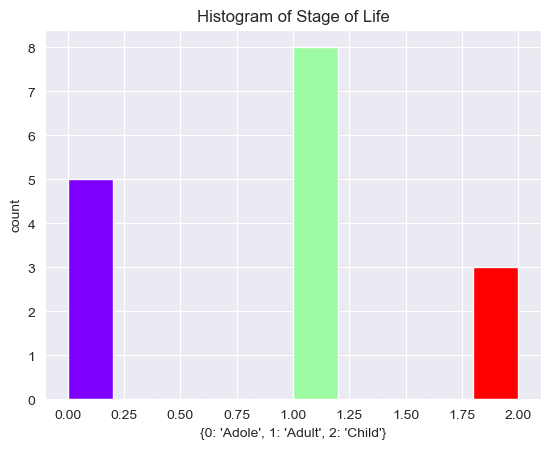

In [12]:
from matplotlib.pyplot import cm

for feat in features:
    data = initial_molluscs_data_numerical[feat]
    plt.title(f'Histogram of {feat}')
    N, bins, patches = plt.hist(data)
    color = cm.rainbow(np.linspace(0, 1, len(patches)))
    #plt.bar_label([str(key) + ': ' + str(value) for key, value in cat_code_translation_life_stages.items()], fontsize=20)
    for i in range(0,len(patches)):
        patches[i].set_facecolor(color[i])
    plt.xlabel(feat)
    plt.ylabel('count')
    if feat == 'Sex':
        plt.xlabel(cat_code_translation_sex)
    elif feat == 'Stage of Life':
        plt.xlabel(cat_code_translation_life_stages)
    plt.show()

results

1.3. PDFs and CDFs

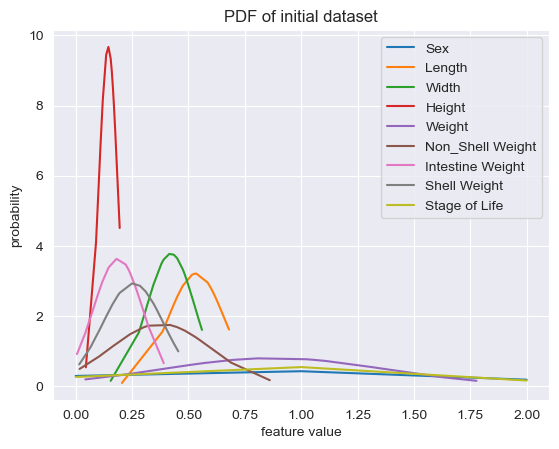

In [13]:
from scipy.stats import norm

for feat in features:
    pdf = norm.pdf(np.sort(initial_molluscs_data_numerical[feat]), initial_molluscs_data_numerical[feat].mean(), initial_molluscs_data_numerical[feat].std())
    plt.plot(np.sort(initial_molluscs_data_numerical[feat]), pdf, label=feat)
plt.xlabel('feature value')
plt.ylabel('probability')
plt.legend()
plt.title('PDF of initial dataset')
plt.show()

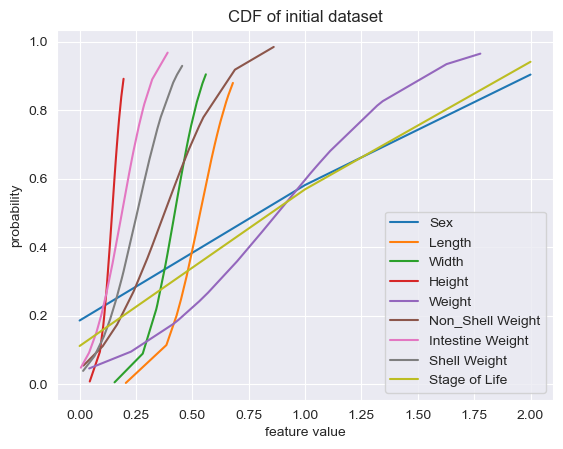

In [14]:
import numpy as np

for feat in features:
    cdf = norm.cdf(np.sort(initial_molluscs_data_numerical[feat]), initial_molluscs_data_numerical[feat].mean(), initial_molluscs_data_numerical[feat].std())
    plt.plot(np.sort(initial_molluscs_data_numerical[feat]), cdf, label=feat)
plt.xlabel('feature value')
plt.ylabel('probability')
plt.legend()
plt.title('CDF of initial dataset')
plt.show()

results

2.1. Scatter plots

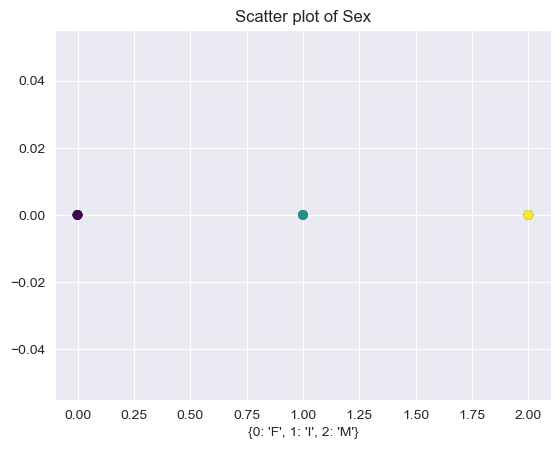

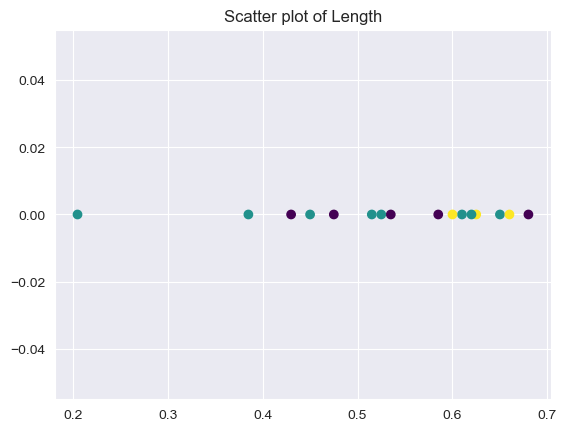

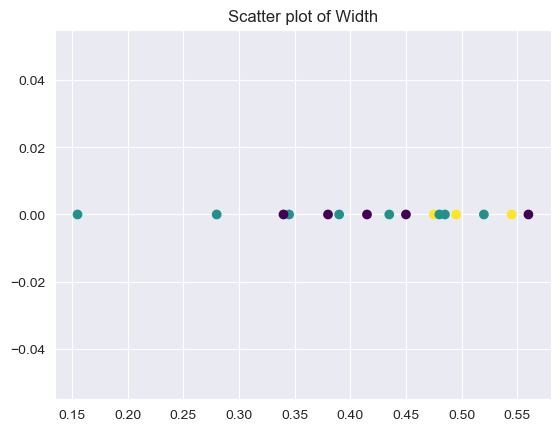

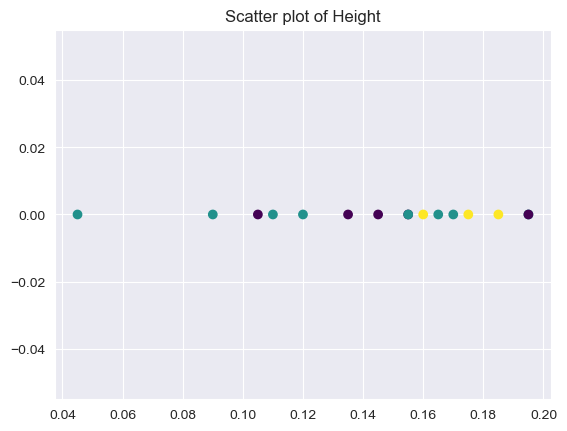

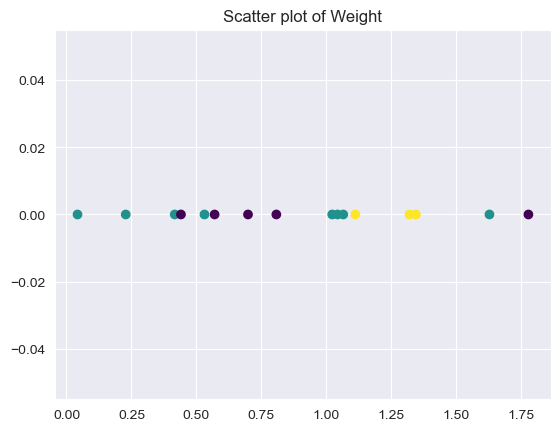

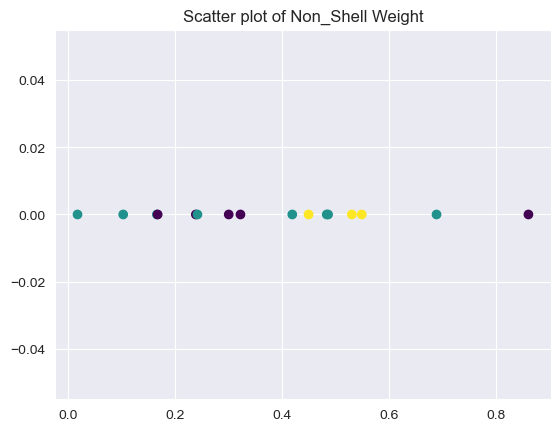

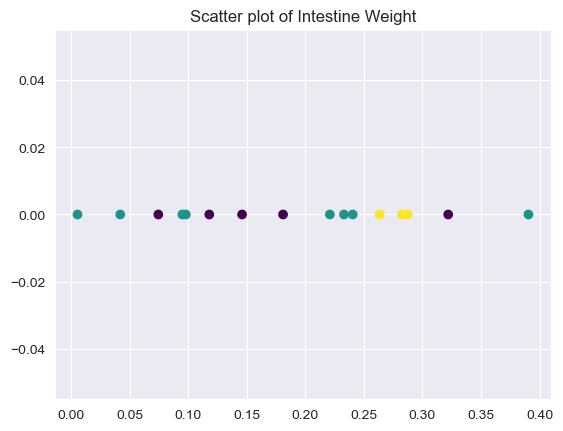

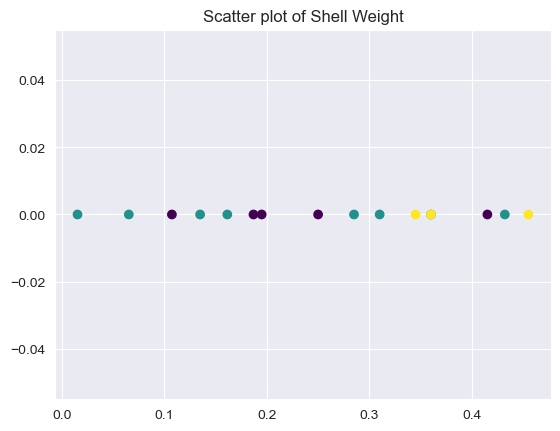

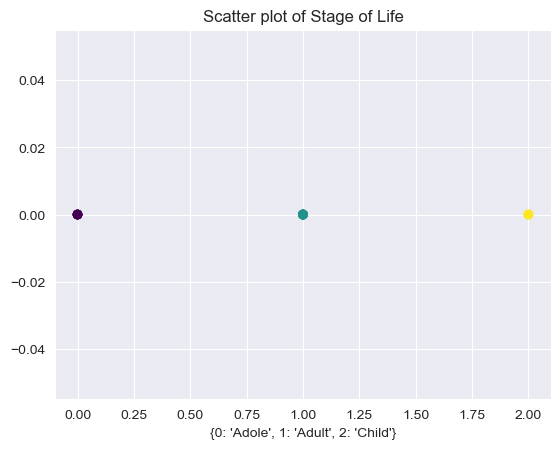

In [15]:
for feat in features:
    data = initial_molluscs_data_numerical[feat]
    plt.scatter(data, np.zeros_like(data), c=initial_molluscs_data_numerical['Stage of Life'], cmap='viridis', label=initial_molluscs_data_numerical['Stage of Life'])
    plt.title(f'Scatter plot of {feat}')
    # TODO gerneate legend containing color
    if feat == 'Sex':
        plt.xlabel(cat_code_translation_sex)
    elif feat == 'Stage of Life':
        plt.xlabel(cat_code_translation_life_stages)
    plt.show()

2.2. Correlation matrices

<Axes: >

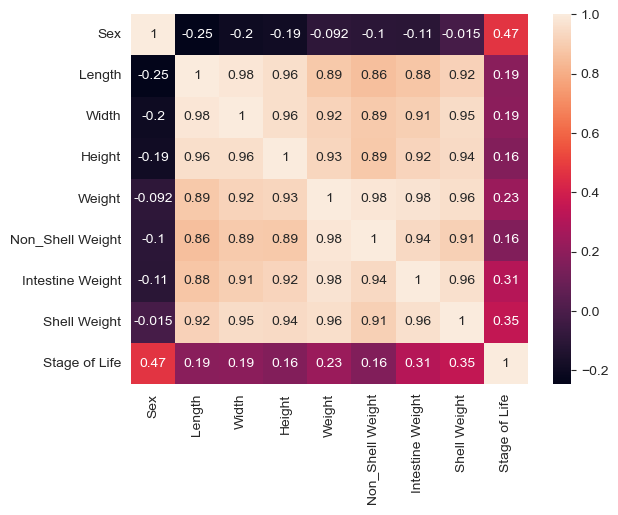

In [16]:
import seaborn as sns
sns.heatmap(initial_molluscs_data_numerical.corr(), annot=True)

results

## Data preprocessing
Individually apply StandardScaler to numerical features.

In [17]:
from sklearn.preprocessing import StandardScaler

scaled_numerical_df = initial_molluscs_data_numerical.copy()
scalers = {}

#display(initial_molluscs_data_numerical)

for feat in features:
    # store scaler in a variable to be able to inverse transform the data
    scalers[feat] = StandardScaler()
    scaled_numerical_df[feat] = scalers[feat].fit_transform(scaled_numerical_df[[feat]].values.reshape(-1, 1))

#display(scaled_numerical_df)

# revert scaling
inverted_scaled_numerical_df = scaled_numerical_df.copy()
for feat in features:
    # use stored scaler to inverse transform the data
    inverted_scaled_numerical_df[feat] = scalers[feat].inverse_transform(inverted_scaled_numerical_df[[feat]].values.reshape(-1, 1))

inverted_scaled_numerical_df = inverted_scaled_numerical_df.astype({'Sex':'int64', 'Stage of Life':'int64'}, copy=True)
display(initial_molluscs_data_numerical.compare(inverted_scaled_numerical_df))

#display(inverted_scaled_numerical_df)
print('identical to prescaled dataframe: ', not initial_molluscs_data_numerical.compare(inverted_scaled_numerical_df).notnull().values.any(), '\nworks! cf. above')

Length         Width         Weight         Non_Shell Weight          \
     self  other   self  other    self   other             self   other   
3     NaN    NaN    NaN    NaN     NaN     NaN              NaN     NaN   
4   0.205  0.205  0.155  0.155  0.0425  0.0425           0.0170  0.0170   
11    NaN    NaN    NaN    NaN  0.2280  0.2280           0.1025  0.1025   

   Intestine Weight         Shell Weight          
               self   other         self   other  
3               NaN     NaN       0.1075  0.1075  
4            0.0055  0.0055       0.0155  0.0155  
11           0.0420  0.0420          NaN     NaN

identical to prescaled dataframe:  False 
works! cf. above


## creation of supplementary dataset request

### Data set size

An individual sample will take approximately 30min to be generated.
The E-Mail will be sent on Friday, possibly Thursday night.
However, for simplicity reason I calculate with Friday 12 o'clock.

I am most likely busy on Thursday, 22.06.2023.
Therefore, I have to work on the new samples on Wednesday (21.06.2023) or Thursday night (22.06.2023).
Thus, I have either 5 or 6 days to generate the new samples.

2 samples per hour can be generated.
A day has 24 hours.
Thus, 48 samples can be generated per day.

5 days * 48 samples = 240 samples
6 days * 48 samples = 288 samples

I should request 240 or 288 samples.


### Data set generation
One may scale the faetures before generating the new samples and inverse them afterwards OR use the non-scaled version to generate new data points.

The dataset has to be generated by some process.
1. Normal distribution
2. Latin cube sampling


3.1 The first approach that comes to mind is a normal uni-variate distribution.

In [18]:
data_set_size = 240

In [25]:
# convert generated datato plausible values
def post_process_generated_data(df):
    # change feature values within the range they occur in the initial dataset
    while df[df < 0].count().values.any():
        df[df <= 0] += uniform(0.01, 0.7)
    df = df.astype({'Sex':'int64', 'Stage of Life':'int64'}, copy=True)
    df['Stage of Life'] = np.nan    # or drop
    return df

In [26]:
from random import uniform

new_normal_df = pd.DataFrame(columns=features)

for feat in features:
    new_normal_df[feat] = np.random.normal(initial_molluscs_data_numerical[feat].mean(), initial_molluscs_data_numerical[feat].std(), data_set_size)

# change feature values within the range they occur in the initial dataset
# TODO: range
new_normal_df = post_process_generated_data(new_normal_df)
display(new_normal_df)

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,0,0.393158,0.562747,0.063181,2.050465,0.095824,0.256871,0.384131,NaN
1,0,0.396160,0.544208,0.076223,1.257363,0.587903,0.181549,0.058316,NaN
2,0,0.565333,0.237566,0.167651,0.859049,0.415595,0.197220,0.220775,NaN
3,0,0.785720,0.325904,0.128787,1.311063,0.176636,0.353158,0.483309,NaN
4,0,0.654667,0.402592,0.169456,0.652864,0.427345,0.182767,0.380100,NaN
...,...,...,...,...,...,...,...,...,...
235,0,0.505830,0.346680,0.216126,0.040721,0.341477,0.332363,0.218970,NaN
236,0,0.438762,0.396702,0.136635,0.628362,0.511417,0.042836,0.063080,NaN
237,2,0.468065,0.473406,0.115129,0.384520,0.427799,0.057317,0.410791,NaN
238,1,0.460692,0.595954,0.098537,1.816721,0.106475,0.250900,0.344519,NaN


3.2. Latin Cube

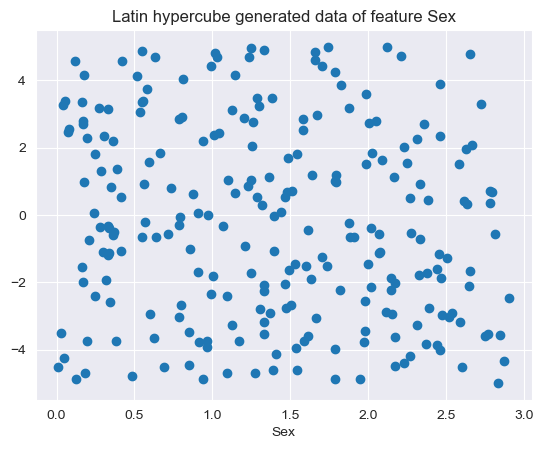

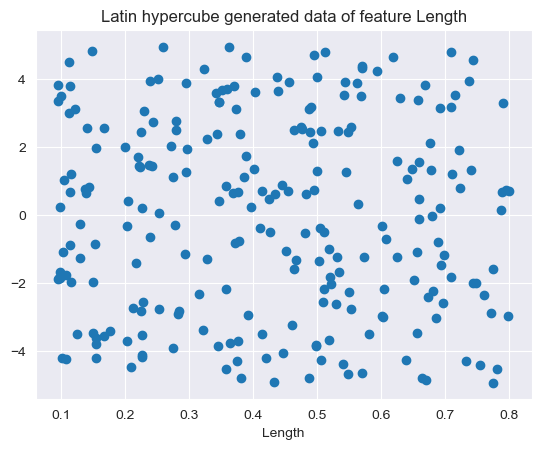

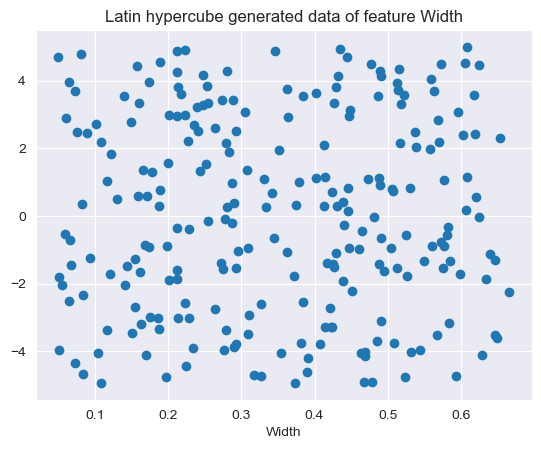

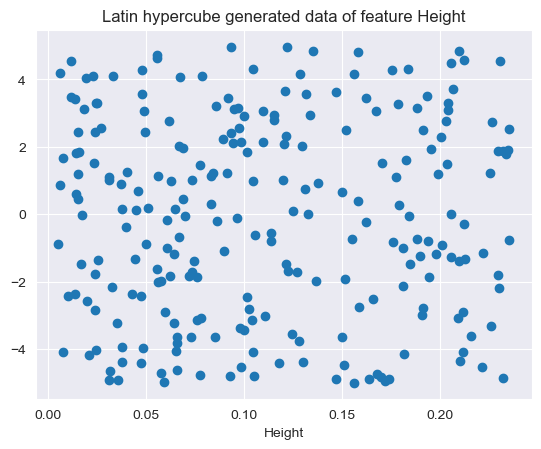

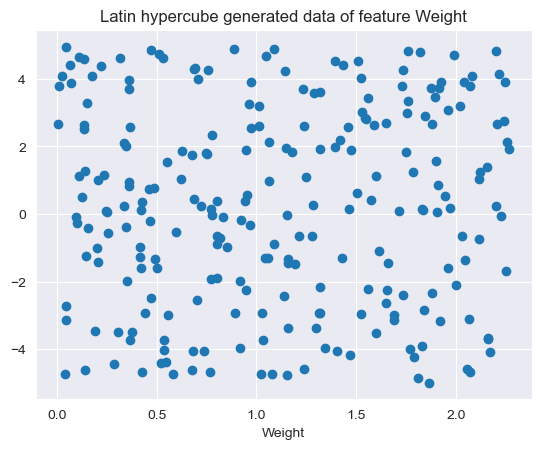

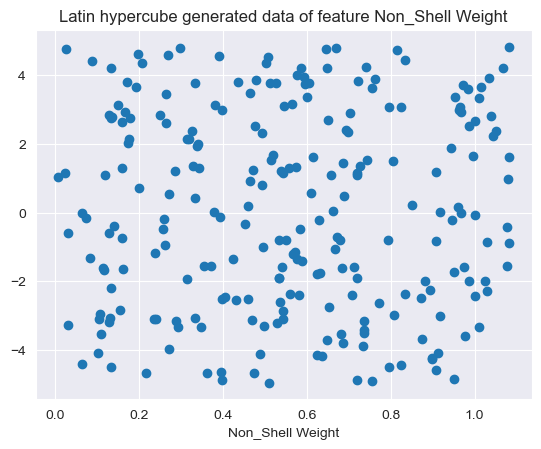

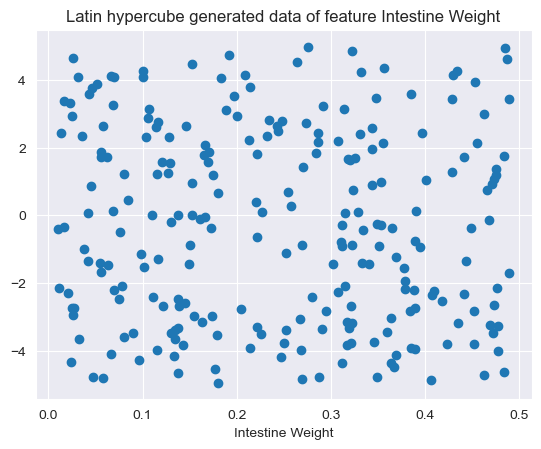

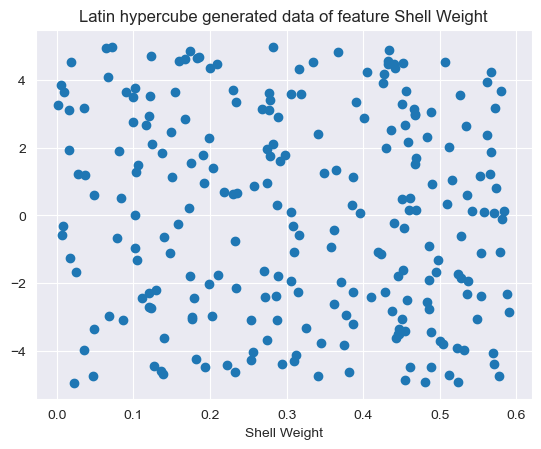

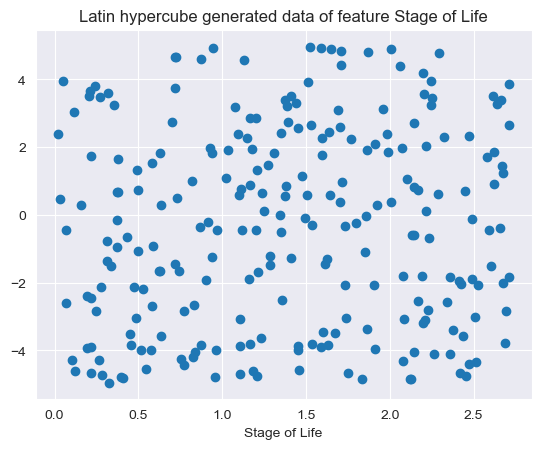

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,1,0.601984,0.212767,0.209991,1.034218,0.341792,0.407488,0.186177,NaN
1,1,0.607483,0.381734,0.181004,0.777028,0.339882,0.323122,0.489379,NaN
2,2,0.294130,0.440115,0.022760,0.141486,1.016276,0.355016,0.102723,NaN
3,1,0.743793,0.354090,0.055817,2.214761,0.951508,0.103386,0.167780,NaN
4,0,0.739779,0.280718,0.127926,0.550033,0.158235,0.418374,0.364253,NaN
...,...,...,...,...,...,...,...,...,...
235,2,0.271445,0.239464,0.109528,0.038556,0.681558,0.179461,0.027732,NaN
236,2,0.570522,0.161043,0.032408,1.728100,0.968446,0.287274,0.584158,NaN
237,0,0.619016,0.391346,0.097960,0.103145,0.030606,0.343785,0.488090,NaN
238,0,0.498733,0.625050,0.005835,1.527517,0.614609,0.078189,0.349297,NaN


In [27]:
from e2ml.experimentation import lat_hyp_cube

new_latin_df = pd.DataFrame(columns=features)

# Generate data_set_size two-dimensional conditions `X` with the Latin hypercube
# in the hypercube [x_min, x_max] x [1, 5].
for feat in features:
    # exploit feature space using one sigma deviation
    std = initial_molluscs_data_numerical[feat].std()
    x_min = max(min(initial_molluscs_data_numerical[feat]) - std, 0)    # features should not be negative or zero for plausibility reasons
    x_max = max(initial_molluscs_data_numerical[feat]) + std
    bounds = [[x_min, x_max], [-5, 5]]
    X_lat = lat_hyp_cube(data_set_size, 2, bounds)
    new_latin_df[feat] = X_lat[:, 0]

    # Plot generated conditions.
    plt.scatter(X_lat[:, 0], X_lat[:, 1])
    plt.title('Latin hypercube generated data of feature ' + feat)
    plt.xlabel(feat)
    plt.show()

new_latin_df = post_process_generated_data(new_latin_df)
display(new_latin_df)

3.3. Halton Sequence

what kind of experiment? controlled etc.